# Wine quality prediction using gradient descent

We will predict the quality of wines from chemical measurements. We will model the prediction problem as a least-squares optimization problem, and use gradient descent to solve the optimization problem. We will use the following approach for setting the gradient descent step sizes, called exact line search. In each iteration, we choose the step size $\eta$ that minimizes the function value of the new point $x^{(t)} - \eta \nabla f(x^{(t)})$, i.e.:

$$ \eta_t = \arg\min_{\eta \in \mathbb{R}} f(x^{(t)} - \eta \nabla f(x^{(t)}))$$

## The wines dataset

In [3]:
# read the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine_samples = pd.read_csv('wines-data.csv', sep=';', header=0)

data = wine_samples.values[:, :-1]
target = wine_samples.values[:, -1]

# print the first 10 rows
wine_samples.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Fitting a least-squares model

For wine sample $i$, let us denote by $y_i \in \mathbb{R}$ its score and by $\mathbf{x}_i \in \mathbb{R}^{11}$ its chemical properties. We will construct a linear model to predict $y_i$ as a function of $\mathbf{x}_i$, that is, we want to find $\mathbf{a} \in \mathbb{R}^{11}$ and $b \in \mathbb{R}$ such that
    $$ y_i \approx \mathbf{a}^T x_i + b$$
As we have seen in class, we can do so by solving the following optimization problem:
    $$ \min_{\mathbf{a} \in \mathbb{R}^{11}, b \in \mathbb{R}}  f(\mathbf{a}, b)$$
where
$$ f(\mathbf{a}, b) = \sum_{i = 1}^n (y_i - \mathbf{a}^{\top} \mathbf{x}_i - b)^2 $$

In the following, we will use gradient descent with exact line search to solve the above optimization problem on the wines dataset, and obtain a linear model ($\mathbf{a}$ and $b$).

## Analytically solving exact line search

We will first need to analytically derive the solution for exact line search. To do so, let's view our problem in a slightly more compact form. We can redefine $f$ as taking a 12-dimensional vector as input rather than a 11-dimensional vector $\mathbf{a}$ and a scalar $b$. Using this viewpoint, the exact line search problem becomes

$$\min_{\eta}f(\mathbf{z} + \eta\mathbf{d}).$$

Give a closed-form formula for the optimal solution to the exact line search problem. The solution should be expressed in terms of $\mathbf{z}, \mathbf{d}$, the feature vectors $\mathbf{x}_i$, and the scores $y_i$.

Our function: $$f(\mathbf{z} + \eta\mathbf{d})=||\mathbb{X}(\mathbf{z} + \eta\mathbf{d}) - \mathbf{y}||^2_2$$

Take the derivative: $$\frac{df}{d\eta} = 2 (\mathbb{X} \mathbf{d})^T (\mathbb{X} \mathbf{z} + \eta \mathbb{X} \mathbf{d} - \mathbf{y})$$

Set it to 0 and solve for eta: $$0 = 2 (\mathbb{X} \mathbf{d})^T (\mathbb{X} \mathbf{z} + \eta \mathbb{X} \mathbf{d} - \mathbf{y})$$

$$\eta = - \frac{(\mathbb{X} \mathbf{d})^T (\mathbb{X} \mathbf{z} - \mathbf{y})}{(\mathbb{X} \mathbf{d})^T \mathbb{X} \mathbf{d}}$$





## Solving via Gradient Descent

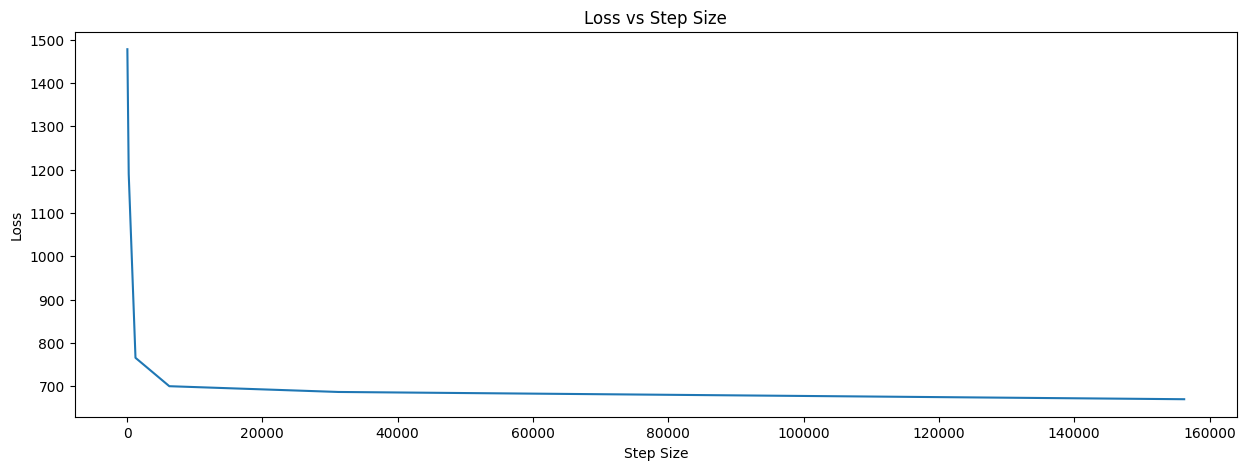

[1477.5887815215297, 1189.8035508372552, 765.6443498249928, 700.1134385516197, 686.8229710628111, 670.0820588710073]


In [15]:
#find eta
def findEta(X, y, z, d):
    X_d = np.dot(X, d)
    X_d_T = np.transpose(X_d)
    X_z = np.dot(X, z)
    X_z_y = X_z - y
    numerator = np.dot(X_d_T, X_z_y)
    denominator = np.dot(X_d_T, X_d)
    eta = numerator * -1 / denominator
    return eta

def gradient(X, y, z):
    grad = 0
    X_T = np.transpose(X)
    X_z = np.dot(X, z)
    y_X_z = y - X_z
    grad = np.dot(X_T, y_X_z)
    return grad * -2


def gradientDescent(step):
    weight = np.zeros(12)
    #turn data and target into numpy array
    X = np.array(data)
    y = np.array(target)
    #add a column of 1 to the data
    X = np.insert(X, 0, 1, axis=1)
    #initialize z randomly
    z = np.random.rand(12)
    #store gradient
    d = gradient(X, y, z)
    #find eta
    eta = findEta(X, y, z, d)
    #update z step number of times
    for i in range(step):
        z = z + eta * d
        d = gradient(X, y, z)
        eta = findEta(X, y, z, d)
    return z

#L=(y−Xz)T (y−Xz)

X = np.array(data)
y = np.array(target)
#adding a column of 1 to the data to account for b
X = np.insert(X, 0, 1, axis=1)
def loss(X, y, z):
    X_z = np.dot(X, z)
    y_X_z = y - X_z
    y_X_z_T = np.transpose(y_X_z)
    loss = np.dot(y_X_z_T, y_X_z)
    return loss

step = [50, 250, 1250, 6250, 31250, 156250]
los = []

for i in step:
    los.append(loss(X, y, gradientDescent(i)))

#plot loss vs step 
plt.figure(figsize=(15,5))
plt.plot(step, los)
plt.xlabel('Step Size')
plt.ylabel('Loss')
plt.title('Loss vs Step Size')
plt.show()
#print loss
print(los)




